# Comparison of Multivariate Linear Regression Models

### Made for CS 4501 Machine Learning - Department of Computer Science - University of Virginia

#### By Ali Shannon (aa3dc@virginia.edu)

***
## 1. BIG PICTURE 
This dataset explores the purchasing power during a Black Friday shopping spree. Uses features such as age, city, occupation, gender, and category of items purchased. My goal is to estimate the amount a buyer is spending during that one day of the year. I have chosen this dataset because the information seem interesting and useful for a retail stores that wishes to understand the demographics or items they ought to invest in for future events.

The dataset contains only one CSV (Comma Separated Value) file and I will explore the correlations between the different features. My goal is to explore statistical information, clean up the dataset, and attempt to make my own regression model to test it against ones that are readily available from scikit-learn.

Data is available [here](https://www.kaggle.com/mehdidag/black-friday).

 * This dataset is about 25MB 
 * Contains 537,577 entries (or rows)
 * 12 total columns, 9 of which will be considered as features

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
datasetURL = "https://www.kaggle.com/mehdidag/black-friday"; # required url to download for CSV file. The TA will need to download the file and run your program.

---
## 2. DATA DISCOVERY, CLEANING, AND SCALING


**Data Discovery** here I will explore the dataset and visualize some relationships

In [2]:
# read the csv file into a pandas dataframe
df = pd.read_csv('BlackFriday.csv')
# display shape
print(df.shape)
# display first 5 entries
df.head()

(537577, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Display basic statistical information for each column

In [3]:
# Basic statistical information
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Quickly we can tell that there are missing values. The mean of the purchase amount seems to be around \\$9333 with a standard deviation of about \\$4981. I will see if my model can have a lower variance score.

In [4]:
# type of data in each column
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

To visualize some important statistical information, I will convert all columns in the originial dataframe to numerical values and save it to a new dataset. Using `LabelEncoder` which will change categorical values to numerical `int` values.

In [5]:
from sklearn.preprocessing import LabelEncoder

# use numerical results for correlation matrix
st = df.apply(LabelEncoder().fit_transform)

# the corr() method automatically ignores null values 
st.corr(method = 'spearman').style.background_gradient(cmap = 'GnBu').set_precision(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1,-0.016,-0.031,0.046,-0.021,0.026,-0.03,0.019,0.0024,0.0014,-0.026,0.0043
Product_ID,-0.016,1,0.018,0.022,0.0081,0.00085,-0.0018,0.011,0.0098,0.1,0.12,-0.081
Gender,-0.031,0.018,1,-0.0058,0.12,-0.004,0.014,-0.01,-0.063,-0.012,-0.024,0.054
Age,0.046,0.022,-0.0058,1,0.093,0.11,-0.0023,0.31,0.063,0.036,0.02,0.022
Occupation,-0.021,0.0081,0.12,0.093,1,0.037,0.03,0.017,-0.016,-0.0076,-0.0064,0.023
City_Category,0.026,0.00085,-0.004,0.11,0.037,1,0.021,0.04,-0.032,-0.033,-0.034,0.069
Stay_In_Current_City_Years,-0.03,-0.0018,0.014,-0.0023,0.03,0.021,1,-0.013,-0.0058,-0.0043,-0.00087,0.006
Marital_Status,0.019,0.011,-0.01,0.31,0.017,0.04,-0.013,1,0.021,0.014,0.011,0.0018
Product_Category_1,0.0024,0.0098,-0.063,0.063,-0.016,-0.032,-0.0058,0.021,1,0.58,0.41,-0.37
Product_Category_2,0.0014,0.1,-0.012,0.036,-0.0076,-0.033,-0.0043,0.014,0.58,1,0.53,-0.27


We notice that the highest correlations occur between the product categories and the purchase price which we are trying to predict.

Let's explore the data some more and look at different distributions.

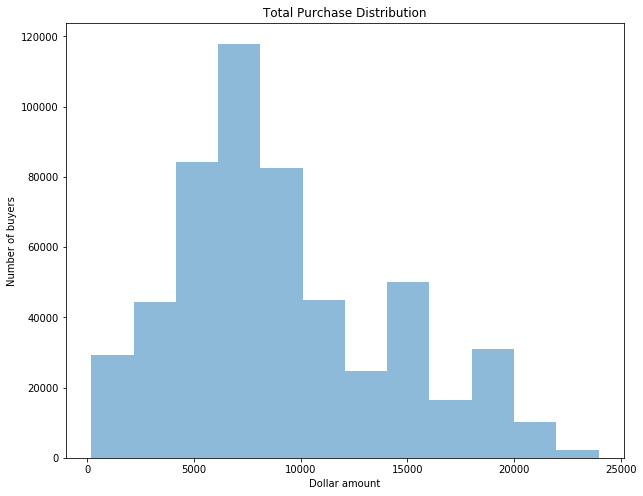

In [6]:
plt.figure(figsize=(10,8))
df['Purchase'].plot.hist(bins=12, alpha=0.5);
plt.xlabel('Dollar amount');
plt.ylabel('Number of buyers');
plt.title('Total Purchase Distribution');
plt.show()

There is a peak of dollar amount that the customers are willing to spend on Black Friday.

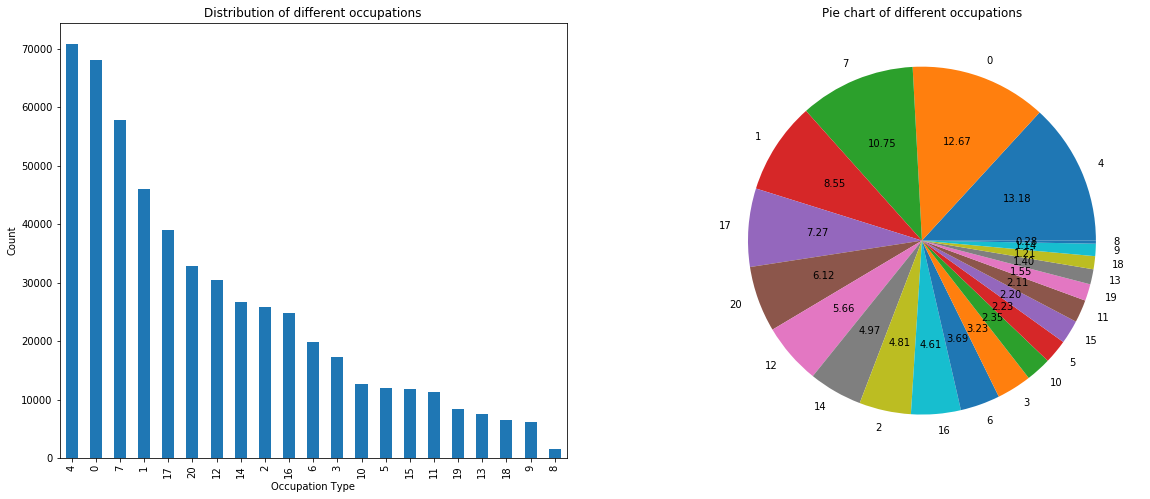

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(121)
pd.value_counts(df['Occupation']).plot.bar();
plt.xlabel('Occupation Type');
plt.ylabel('Count');
plt.title('Distribution of different occupations')

plt.subplot(122)
pd.value_counts(df['Occupation']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of different occupations')
plt.show()

Certain occupations have more purchasing power than others.

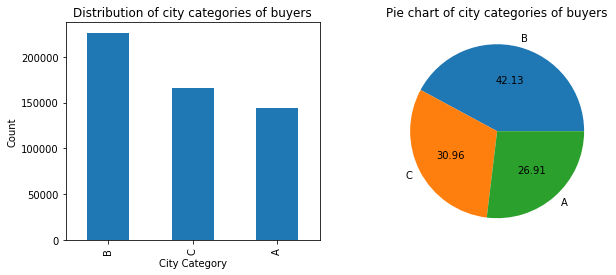

In [8]:
plt.figure(figsize=(10,4))

plt.subplot(121)
pd.value_counts(df['City_Category']).plot.bar();
plt.xlabel('City Category');
plt.ylabel('Count');
plt.title('Distribution of city categories of buyers')

plt.subplot(122)
pd.value_counts(df['City_Category']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of city categories of buyers')
plt.show()

City category `B` has the highest number of buyers on a Black Friday

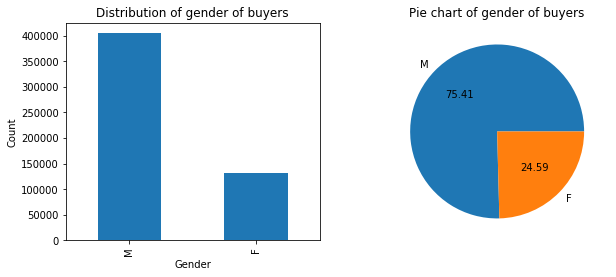

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(121)
pd.value_counts(df['Gender']).plot.bar();
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Distribution of gender of buyers')

plt.subplot(122)
pd.value_counts(df['Gender']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of gender of buyers')
plt.show()

It appears that there are more male buyers on Black Friday 

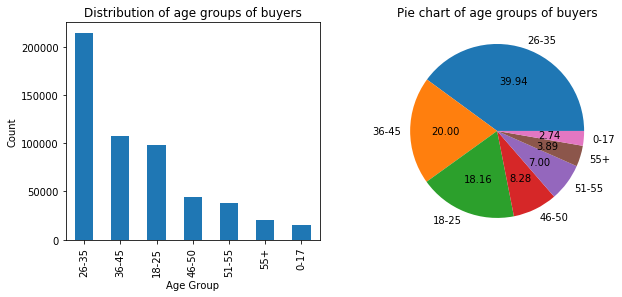

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(121)
pd.value_counts(df['Age']).plot.bar();
plt.xlabel('Age Group');
plt.ylabel('Count');
plt.title('Distribution of age groups of buyers')

plt.subplot(122)
pd.value_counts(df['Age']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of age groups of buyers')
plt.show()

The majority of buyers are between the ages of 26-35 and goes down per age group

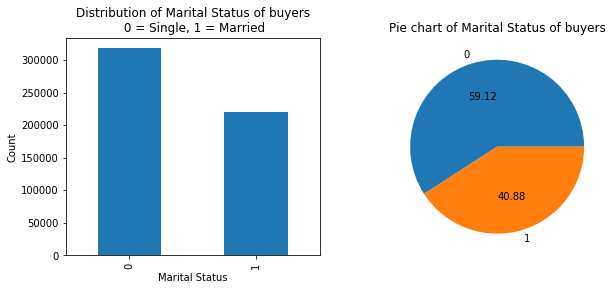

In [11]:
plt.figure(figsize=(10,4))

plt.subplot(121)
pd.value_counts(df['Marital_Status']).plot.bar();
plt.xlabel('Marital Status');
plt.ylabel('Count');
plt.title('Distribution of Marital Status of buyers\n 0 = Single, 1 = Married')

plt.subplot(122)
pd.value_counts(df['Marital_Status']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of Marital Status of buyers')
plt.show()

Singles form a slightly larger majority of the buyers

**Data Cleaning**

Here I will clean up the dataset by removing unnecessary columns and dealing with missing values.

In [12]:
# these columns are unnecessary for my regression analysis

df = df.drop(columns = ['User_ID', 'Product_ID'])

Check for missing values

In [13]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Since both of these columns contain numerical data, I will use `Imputer` on both of them to replace missing values with the mean value for each column.

In [14]:
from sklearn.preprocessing import Imputer

df[['Product_Category_2', 'Product_Category_3']] = Imputer(strategy='mean').fit_transform(df[['Product_Category_2', 'Product_Category_3']]
)

df[['Product_Category_2', 'Product_Category_3']].head()

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Product_Category_2,Product_Category_3
0,9.842144,12.66984
1,6.000000,14.00000
2,9.842144,12.66984
3,14.000000,12.66984
4,9.842144,12.66984


In [15]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


No more missing values

Next task is to convert strings into numerical fields

In [16]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Using `get_dummies` we can convert `str` fields into `float` or `int` 

In [17]:
# first convert these int columns to float before using get_dummies to prevent it from transforming them
cols = ['Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase']
df[cols] = df[cols].astype(float)


# apply get_dummies
df = pd.get_dummies(df)

df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10.0,0.0,3.0,9.842144,12.66984,8370.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10.0,0.0,1.0,6.000000,14.00000,15200.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10.0,0.0,12.0,9.842144,12.66984,1422.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10.0,0.0,12.0,14.000000,12.66984,1057.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16.0,0.0,8.0,9.842144,12.66984,7969.0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [18]:
df.dtypes

Occupation                       float64
Marital_Status                   float64
Product_Category_1               float64
Product_Category_2               float64
Product_Category_3               float64
Purchase                         float64
Gender_F                           uint8
Gender_M                           uint8
Age_0-17                           uint8
Age_18-25                          uint8
Age_26-35                          uint8
Age_36-45                          uint8
Age_46-50                          uint8
Age_51-55                          uint8
Age_55+                            uint8
City_Category_A                    uint8
City_Category_B                    uint8
City_Category_C                    uint8
Stay_In_Current_City_Years_0       uint8
Stay_In_Current_City_Years_1       uint8
Stay_In_Current_City_Years_2       uint8
Stay_In_Current_City_Years_3       uint8
Stay_In_Current_City_Years_4+      uint8
dtype: object

Now all of our data is displayed in numerical values and is ready for regression analysis.

In [19]:
# split into matrix X and vector y
X = df.drop(columns = 'Purchase').astype(float).values
y = df['Purchase'].values

Apply `StandardScaler` to scale all features then split into training and testing sets to check for fitting later on.

In [20]:
from sklearn.preprocessing import StandardScaler

# scale the features matrix
X = StandardScaler().fit_transform(X)
# add a row of ones for constant theta values
X = np.c_[np.ones(len(X)), X]

from sklearn.model_selection import train_test_split

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT AND NORMAL EQUATION

##### Description of the class `MyLinearRegression`:

* `self.fitUsingGradientDescent` method will use batch gradient descent to find the optimal $\theta$ values. Uses the following parameters:
    - `alpha` ($\alpha$) defines the learning rate. Has a default value of 0.1 unless specified otherwise.
    - `iters` defines the number of iterations to find the optimal theta value, default set to 100 iterations.
    - `self.cost_record` is an array containing the cost value for each iteration.
* `self.fitUsingNormalEquation` method will use the normal equation, $
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}
$, to find the optimal theta value.

* `self.theta` will return the coefficients (or weights) of each feature including the constant term $\theta_{0}$
* `self.cost`, or $J(\theta)$, will return the MSE value or cost of implementing of this method.

In [21]:
class MyLinearRegression:
    def __init__(self):
        return None
    
    def fitUsingGradientDescent(self, X_train, y_train, alpha = 0.1, iters = 100):
                
        # assume theta to be some random array and modify it later
        theta = np.random.rand(len(X_train[0])) 
        
        m = len(y_train)
                
        cost_record = [] # to record the cost at every iteration
        
        # loop through the number of iterations to minimize cost value
        for i in range(iters):
            pred = X_train.dot(theta)
            grad = 2/m * X_train.T.dot( pred - y_train )
            theta = theta - alpha * grad
            cost = 1/m * np.sum(np.square(X_train.dot(theta) - y_train)) 
            cost_record.append(cost)
        
        # save these values to the object
        self.cost_record = cost_record
        self.cost = cost
        self.theta = theta
    
    def fitUsingNormalEquation(self, X_train, y_train):
                        
        self.theta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
        
        self.cost = 1/len(y_train) * (X_train.dot(self.theta)-y_train).T.dot(X_train.dot(self.theta)-y_train)
        
    def predict(self, X_test):
                
        return X_test.dot(self.theta)
    
    def cal_cost(self, X_test, y_test):
        return 1/len(y_test) * (X_test.dot(self.theta)-y_test).T.dot(X_test.dot(self.theta)-y_test)

* **Learning Rate:** Finding the rate at which the gradient descent will converge. I will test a few values for the learning rate.

The cost is about 2.48155e+09


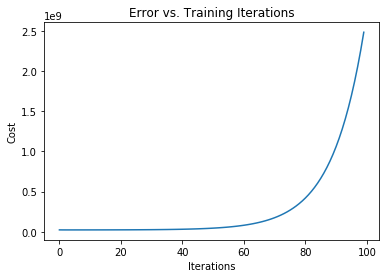

In [22]:
myGradientDescentModel = MyLinearRegression()

myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, alpha = 0.5, iters = 100)
print("The cost is about %g" % myGradientDescentModel.cost)

plt.plot(myGradientDescentModel.cost_record)

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  

plt.show()

With a learning rate of 0.5 and 100 iterations, the model seems to diverge. Let's try a much smaller learning rate at 50 iterations.

The cost is about 3.38407e+07


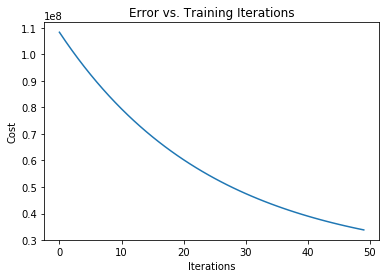

In [23]:
myGradientDescentModel = MyLinearRegression()

myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, alpha = 0.01, iters = 50)
print("The cost is about %g" % myGradientDescentModel.cost)

plt.plot(myGradientDescentModel.cost_record)

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  

plt.show()

This is decaying but not quickly enough, let's turn back the number of iterations to 100 and turn up the learning rate to 0.3.

The cost is about 2.20336e+07


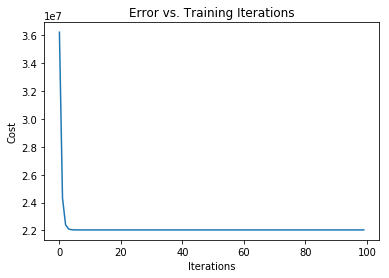

In [24]:
myGradientDescentModel = MyLinearRegression()

myGradientDescentModel.fitUsingGradientDescent(X_train, y_train, alpha = 0.3, iters = 100)
print("The cost is about %g" % myGradientDescentModel.cost)

plt.plot(myGradientDescentModel.cost_record)

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  

plt.show()

Perfect! this learning rate converges quickly to that cost value. Let's check if that is the lowest cost value with our linear model using the normal equation

In [25]:
print("The cost using gradient descent is about %g" % myGradientDescentModel.cost)

The cost using gradient descent is about 2.20336e+07


In [26]:
myNormalEquationModel = MyLinearRegression()

myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

print("The cost using normal equation is about %g" % myNormalEquationModel.cost)

The cost using normal equation is about 2.20366e+07


In [27]:
a = myGradientDescentModel.cost
b = myNormalEquationModel.cost

print('Percent difference between Normal Equation and Gradient Decent cost is {:.5} %'.format((b-a)/b))

Percent difference between Normal Equation and Gradient Decent cost is 0.00013743 %


Splendid! We now have successfully implemented the gradient descent and obtained a cost value close to the optimal theta value.

- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION 

We have previously implemented the normal equation model earlier. Here it is again with the predictions for our values and the minimum cost value.

In [28]:
myNormalEquationModel = MyLinearRegression()

myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

print("The cost using normal equation on training data is about %g" % myNormalEquationModel.cost)

myNormalEquationModel.predict(X_test)

print('The cost using normal equation on testing data is about %g' % myNormalEquationModel.cal_cost(X_test, y_test))

The cost using normal equation on training data is about 2.20366e+07
The cost using normal equation on testing data is about 2.21753e+07


- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS 

Here I am evaluating my model against the `SGDRegressor` method from `scikit-learn`. 

It appears that all models have a very similar RMSE, but my model seems to have a better result than the SGD model.

In [29]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print('SGD Model rmse = {:.5}'.format(mySGDModel_rmse))

myGradientDescentModel_rmse = np.sqrt(myGradientDescentModel.cal_cost(X_test, y_test))
myNormalEquationModel_rmse = np.sqrt(myNormalEquationModel.cal_cost(X_test, y_test))

print('Batch Gradient Descent Model rmse = {:.5}'.format(myGradientDescentModel_rmse))
print('Normal Equation Model rmse = {:.5}'.format(myNormalEquationModel_rmse))


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGD Model rmse = 4715.6
Batch Gradient Descent Model rmse = 4708.7
Normal Equation Model rmse = 4709.1


Both of my models seem to perform slightly better than the SGD provided by scikit-learn.

- - -
## 6. PRESENTATION OF SOLUTION

With this model we can predict the purchasing power of each client on Black Friday. I was successfully able to write a prediction method to estimate the amount spent by any client with a margin of error of about \$4700 USD. 

Making my own predictor let me understand some of the underlying theorems behind linear regression. In the future, I seek to find a better estimator by further expanding the dataset to include more data.